# Jupyter & Cartopy Guest Lecture

*By: Ty Janoski*

*Ph.D. Candidate*

*04.12.2023*

Have questions about the contents of this lecture? Email me! janoski@ldeo.columbia.edu

## Welcome to JupyterLab!

### Why use JupyterLab?

So far in this class, you have used Spyder for most of your computing. Spyder is what we call an **integrated development environment (IDE)**. It is excellent for writing python (.py) scripts and debugging them. There are times, however, when we might want something more user-friendly and interactive, especially if we are making lots of plots or integrating various scripts and files. This is where JupyterLab fits in.

Some nice features of JupyterLab are that it:
* Opens many different file types
* Runs right in your browser
* Supports mulitple programming languages (Python, R, Julia, etc.)
* Is widely used and well-documented
* Has a whole library of useful third-party extensions
* Lets you export notebooks as PDFs to share or even presentation slides
* Frequently autosaves and stores checkpoints in a folder for you

![Jupyter Logo](jupyter_logo.png)

Sources:

[JupyterLab documentation](https://jupyterlab.readthedocs.io/en/stable/)

[Markdown guide](https://www.markdownguide.org/basic-syntax)

### Jupyter basics

Let's start exploring JupyterLab. The central window where this text appears with the tabs at the top is the **work area**. The other two important areas are the **left sidebar and menu bar**.

#### Work area

This contains all your currently open files as tabs. The file we are working through right now is a **notebook**. The notebook is made up of **cells**, which are individual units of executable code or text. If you double-click on this text, you will see that it is actually written in a format called **Markdown**. We will write some code in a bit.

#### Left sidebar

This contains your file navigator, which is incredibly useful for finding and opening your scripts, notebooks, plots, etc. The other tabs show the list of currently running kernels, the table of contents of your notebook, and the third-party extensions library. The large plus button near the top is how we can make new files using Jupyter.

#### Menu bar

Very useful and mostly self-explanatory. File, edit, kernel, and settings contain many of the commonly used actions.

#### Workspace

The collection of tabs we have open is our **workspace**. We can save our workspace so that we can always open up the same files as a batch.

### Jupyter notebooks

#### Working with cells

The best way to learn about notebooks is to run one yourself. To run a cell, whether it's code or markdown, simply enter the cell with your cursor and hit `Shift + Enter`. You can also click the "play" button at the top of the notebook, or navigate to the run menu in the menu bar.

**Try running the cell of code below!**


In [1]:
print('This is a test to see if you can run a cell :) ')

This is a test to see if you can run a cell :) 


Easy enough. Let's run another.

In [2]:
# an innocent loop
i=1
while(i>0):
    pass

KeyboardInterrupt: 

Notice some of the indicators that a cell is being executed.

**Now, run the cell below.**

Here's the formula for hydrostatic balance:

$$\frac{dp}{dz} = -\rho g$$

We have to be careful to make sure our cells are labeled correctly as code or markdown. To change the above cell to markdown, click to the left of the cell (outside the text block) and hit `M` on your keyboard. Alternatively, click in the text and change the dropdown at the top of the notebook from "code" to "Markdown"

#### A couple quick exercises!

1. In the folder for this lecture, there is a file named animal.jpg. Open it using Jupyter's file explorer. In a new markdown cell below, type what kind of animal it is. Insert the picture in the cell using markdown (see image earlier in notebook for example!)

2. In a new python script file (.py) created using JupyterLab, write a function called get_var that calculates the variance of a list of integers. The variance is equal to the standard deviation, squared. No need to reinvent the wheel - you can use numpy's std function (`np.std`). Import the function in a new cell and calculate the variance of this list: `[1,1,2,3,5,8]`

## Cartopy

### Making maps with Python

Producing 2D visual representations of spatial geophysical data is notoriously difficult. It is *impossible* to represent the oblate spheroid that is Earth as flat without distortion. We also have to pick where to slice our sphere.

Previously, you guys learned about PyGMT, a library designed to bring the incredibly useful Generic Mapping Tools to Python. This week, we are going to instead learn about Cartopy, an older and more established map-making library for Python designed to work with Matplotlib. Cartopy is usually a bit slower than PyGMT and does not have as high a default resolution, but its many options and expansive user base are often enough to make up for this.

### Sources
* [The official Cartopy documentation](https://scitools.org.uk/cartopy/docs/latest/getting_started/index.html)
* [Phil Elson's Cartopy tutorial](https://github.com/SciTools/cartopy-tutorial)
* [Ryan Abernathey's Cartopy lecture](https://earth-env-data-science.github.io/lectures/mapping_cartopy.html)

![map morality chart](map_chart.png)

### Cartopy Basics

#### Making our first map

Let's start by importing cartopy. Ideally this should be easy if we were able to install it correctly and are in the right environment. We will also import Cartopy's coordinate reference systems (ccrs).

In [4]:
# import statements
import cartopy
import cartopy.crs as ccrs

# other libraries we will use
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# I don't think the following line is necessary anymore in this version of Jupyter
%matplotlib inline

If we type `ccrs.` and hit the `Tab` key, we can see some of the subclasses. You'll see all the projections that are available to us.

In [5]:
ccrs.PlateCarree?

Init signature: ccrs.PlateCarree(central_longitude=0.0, globe=None)
Docstring:     
The abstract class which denotes cylindrical projections where we
want to allow x values to wrap around.
Init docstring:
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
File:           c:\users\tyfol\anaconda3\envs\susc\lib\site-packages\cartopy\crs.py
Type:           ABCMeta
Subclasses:     

Let's try it!

In [6]:
ccrs.PlateCarree()

<Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: unknown
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
ccrs.PlateCarree(central_longitude=-180)

<Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=-180 +t ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: unknown
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Easy but not particularly useful at this point. 

#### GeoAxes

Cartopy's main draw is how well it interacts with Matplotlib. If you remember from previous lectures, when you create a plot in Matplotlib, you produce an Axes (or AxesSubplot) object. Cartopy overrides this to produce an instance of its own axes class, called GeoAxes.

Let's start by making a matplotlib figure with some coastlines. Note that we will call the Pyplot axes method with the "projection" argument. Let's make a figure with the Mollweide projection.

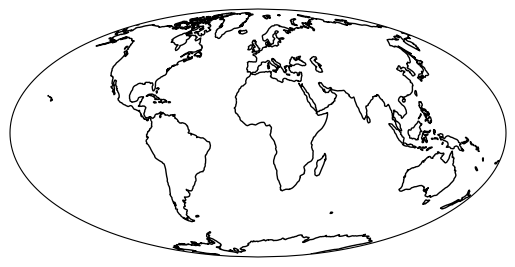

In [8]:
fig = plt.figure() # make a new figure
ax = plt.axes(projection=ccrs.Mollweide()) # create a new GeoAxis
ax.coastlines() # plot the coastlines

There are a multitude of [GeoAxes methods](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html). We've already used the coastlines() method, so let's try a few more.

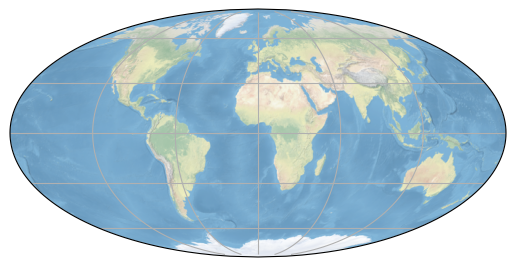

In [9]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.Mollweide())

# add a default underlay to our map
ax.stock_img()

# add grid lines
ax.gridlines()

#### Adding features

We can use the `set_extent()` method to specify an area on the map we want to see. Let's make a quick map of the countries in Africa.

In [10]:
ax.set_extent?

Signature: ax.set_extent(extents, crs=None)
Docstring:
Set the extent (x0, x1, y0, y1) of the map in the given
coordinate system.

If no crs is given, the extents' coordinate system will be assumed
to be the Geodetic version of this axes' projection.

Parameters
----------
extents
    Tuple of floats representing the required extent (x0, x1, y0, y1).
File:      c:\users\tyfol\anaconda3\envs\susc\lib\site-packages\cartopy\mpl\geoaxes.py
Type:      method

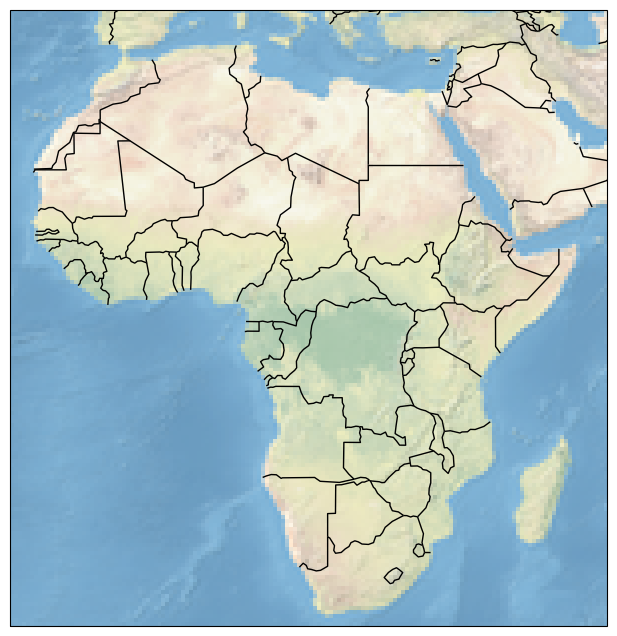

In [11]:
fig = plt.figure(figsize=(8,8)) # new figure...
ax = plt.axes(projection=ccrs.PlateCarree()) # PlateCarree GeoAxis

ax.stock_img()
ax.set_extent((-20,55,-30,35)) # limit from 20W to 55E, 30S to 35N
ax.add_feature(cartopy.feature.BORDERS) # add country borders

Notice the "add_feature" method. With that, we can add rivers, lakes, states, and other features to our maps. The default resolution is quite coarse, so we can specify a higher resolution version. This is done by reading in data from the [Natural Earth Data database](https://www.naturalearthdata.com/).

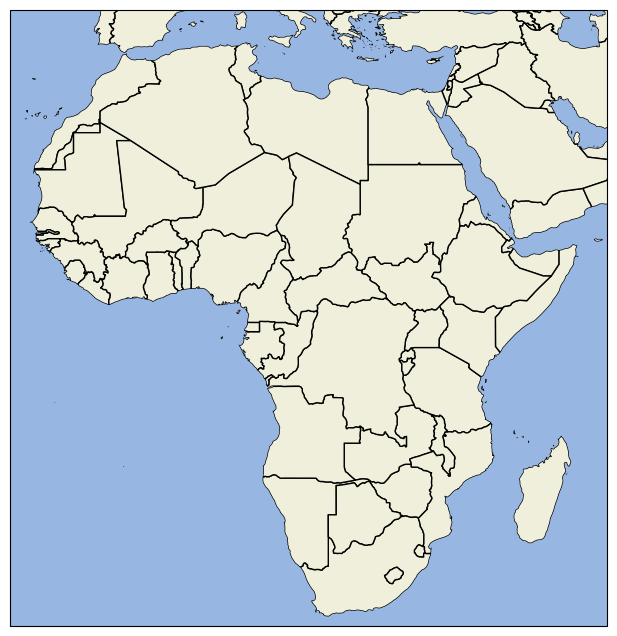

In [12]:
import cartopy.feature as cfeature
# get higher res rivers
borders_50m = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '50m',
                                          edgecolor='black',facecolor=cfeature.COLORS['land'])
oceans_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                          edgecolor='None',facecolor=cfeature.COLORS['water'])

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent((-20,55,-30,35))
ax.add_feature(borders_50m)
ax.add_feature(oceans_50m)

### Combining Data and Cartopy
#### Projection & transform

As we start to plot data on our Cartopy GeoAxes, there are two important keyword arguments to keep in mind: **projection** and **transform**.

We've already had practice setting the projection of the GeoAxes object we create. However, if we want to plot data, *we need to give Cartopy more information about what our data looks like*. This is where the transform keyword argument comes in.

Cartopy's documentation has a great explanation.
> The core concept is that the projection of your axes is independent of the coordinate system your data is defined in. The projection argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The transform argument to plotting functions tells Cartopy what coordinate system your data are defined in.

Let's show this by plotting a line between two points. On a sphere, this can be done a few ways, including:
* as the shortest straight line on the sphere (Geodetic)
* as a straight line in projected (cartesian) space

In [13]:
# set the lat and lons of our points
# remember, degrees west and south are negatives
# dictionaries should look familiar :)
nyc = dict(lat=40.7128,lon=-74.0060)
dubai = dict(lat=25.2048,lon=55.2708)

# make a list of the lats and lons for plotting
lats = [nyc['lat'],dubai['lat']]
lons = [nyc['lon'],dubai['lon']]

Now we will plot the points and lines on a PlateCarree projection, once with specifying the transform and once without. Note that if you do not specify the transform, Cartopy will assume the data is formatted the same as the underlying GeoAxis.

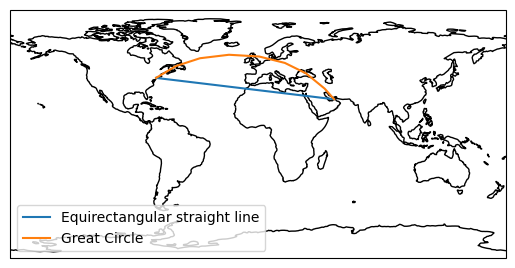

In [14]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line')
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

As you can see, including the transform argument told Cartopy that our data is defined in the Geodetic coordinate system, and thus we plotted our great circle line.

#### 2D data visualization

One of the goals of Cartopy is to simplify mapping visualizations, especially for scientific data; consequently, plotting 2D data is straightforward.

We will make some fake data for now, then we can play around with actual model output later.

In [15]:
# reminder: the linspace function makes equidistant points
lon = np.linspace(-80, 80, 25) # 80W to 80E
lat = np.linspace(30, 70, 25) # 30N to 70N
lon2d, lat2d = np.meshgrid(lon, lat) # makes 2D grid of lat/lon

# make some random data
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

Now let's plot it without the transform argument.

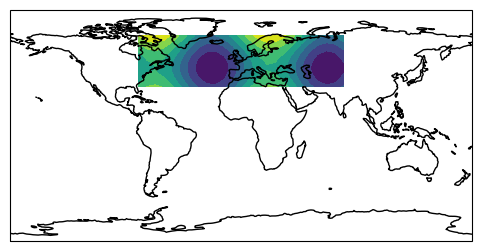

In [16]:
# The projection keyword determines how the plot will look
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global() # show the entire map
ax.coastlines() # add coastlines

ax.contourf(lon, lat, data)  # didn't use transform, but looks ok...

This looks fine because we are plotting on a PlateCarree projection and our data is defined in the same coordinate system. Even if we include the transform argument, nothing should change.

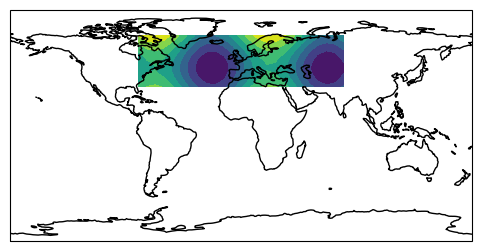

In [17]:
# The data are defined in lat/lon coordinate system, so PlateCarree()
# is the appropriate choice:
data_crs = ccrs.PlateCarree()

# The projection keyword determines how the plot will look
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

ax.contourf(lon, lat, data, transform=data_crs) # contourf = contour fill

Issues arise when we exclude the transform argument and our data and projection are not on the same coordinate system. Look at what happens if we try plotting the data without transform on a different projection.

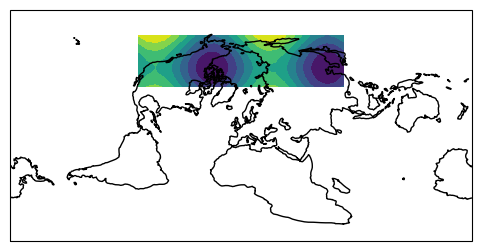

In [18]:
# Now we plot a rotated pole projection
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

ax.contourf(lon, lat, data)  # didn't use transform, RIP

That's definitely not right. Cartopy is assuming our data is on the rotated pole coordinate system already, which is incorrect. Let's fix it.

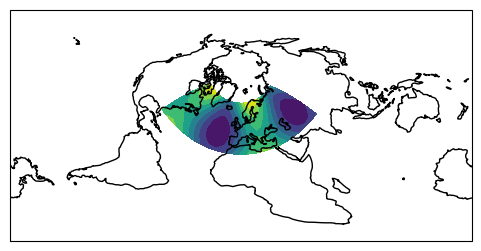

In [19]:
# A rotated pole projection again...
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

# ...but now using the transform argument
ax.contourf(lon, lat, data, transform=data_crs)

Here's our lesson: **Always remember to include the transform and projection arguments when plotting data with Cartopy!**

### Application: Plotting model output with xarray and cartopy
#### Surface air temperature

Now that we are familiar with cartopy, let's do something practical with it. For your coding application, Mike told me you will be looking at some CMIP5 output. Cartopy and Xarray are excellent tools for this type of analysis. You may find JupyterLab useful as well.

For now, let's try reading in CanESM2 (one of the CMIP5 models) surface air temperature output.

In [20]:
import cftime # this is a library
ds = xr.open_dataset('http://strega.ldeo.columbia.edu:81/CMIP5/.byScenario/'+
                      '.historical/.atmos/.mon/.tas/.CanESM2/.r1i1p1/.tas/dods',decode_times=False)

# you can ignore this next part. Columbia's version of the data isn't formatted correctly
# so we have to overwrite the time axis. Then, xarray should be able to understand it.
ds.T.attrs['calendar'] = '360_day'
ds = xr.decode_cf(ds)

We can see what's in this dataset.

In [21]:
ds

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128, T: 1872)
Coordinates:
  * lat      (lat) float32 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * T        (T) object 1850-01-16 00:00:00 ... 2005-12-16 00:00:00
Data variables:
    tas      (T, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL

In [22]:
# save the surface air temperature as its own variable
tas = ds.tas

Let's see what the temperature looks like on our standard Plate Carree projection.

Remember, we want to specify both the projection and transform arguments. Xarray works nicely with Cartopy in that we can feed it the transform argument.

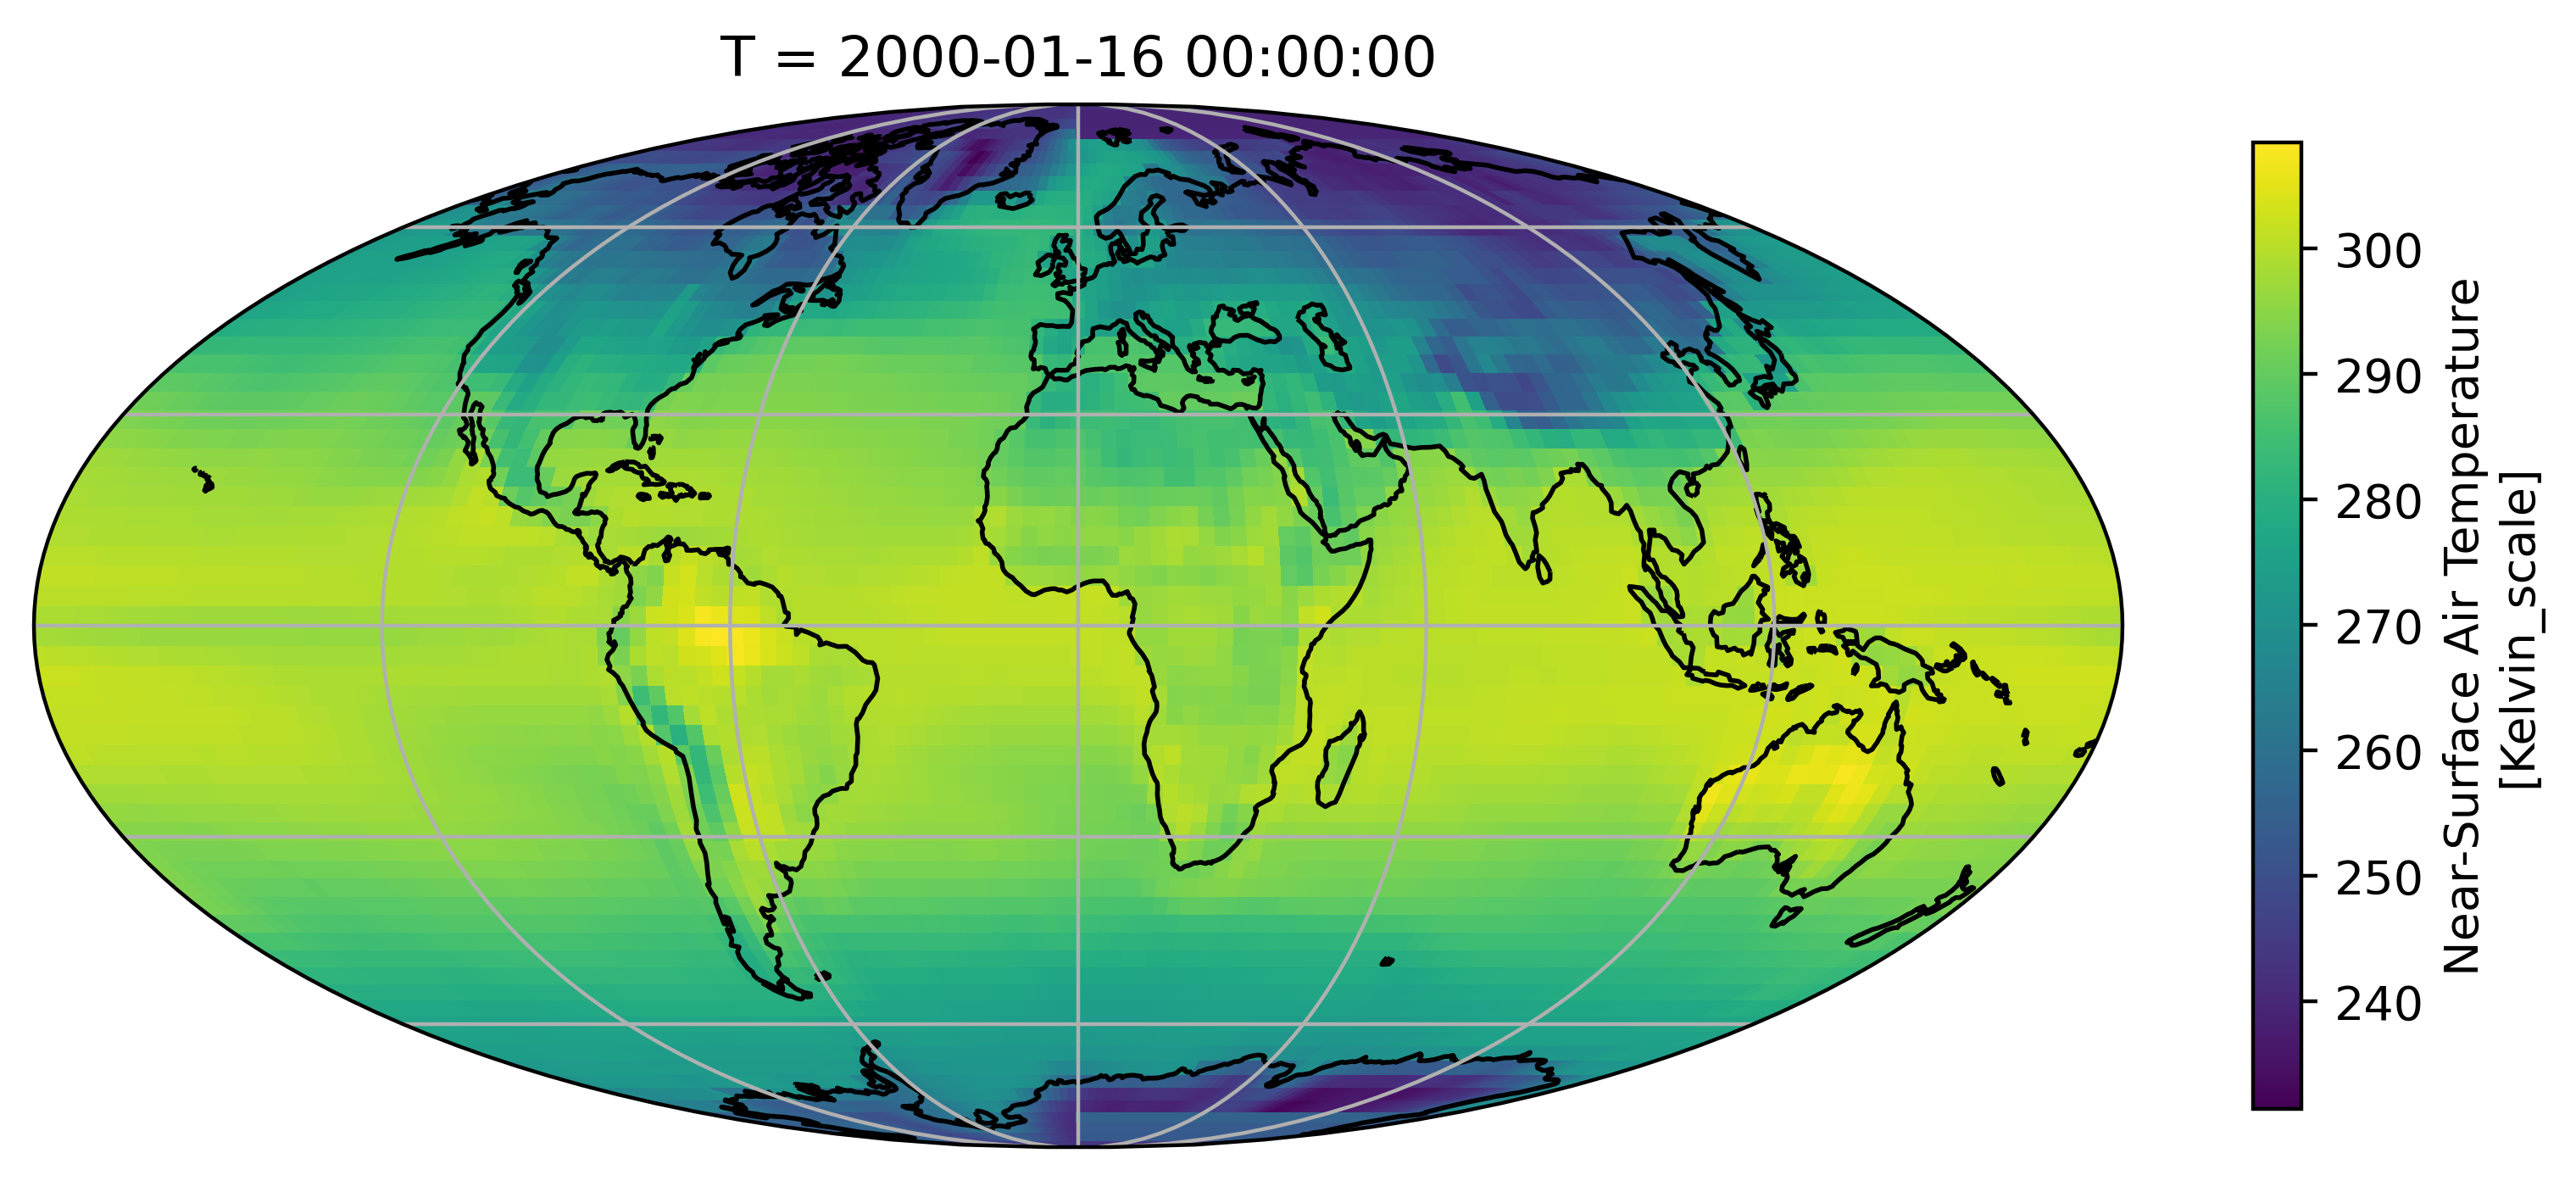

In [23]:
fig = plt.figure(figsize=(8,6),dpi=400) # make a new figure, change resolution
ax = plt.axes(projection=ccrs.Mollweide()) # let's go with Mollweide

# pick some random month to show the temperature
tas.sel(T='2000-01-16').plot(transform=ccrs.PlateCarree(),
                             cbar_kwargs={'shrink': 0.5})

# spruce it up
ax.coastlines()
ax.gridlines()

# trim some whitespace
plt.tight_layout()

We were able to make a publication-worthy plot in just a few lines of code. This is really the power of xarray and cartopy working together.

#### Surface winds

Now let's do something a little different. Let's see what the annual average surface winds over the continental US look like.

In [24]:
# first, the east-west wind
uas = xr.open_dataset('http://strega.ldeo.columbia.edu:81/CMIP5/.byScenario/'+
                      '.historical/.atmos/.mon/.uas/.CanESM2/.r1i1p1/.uas/dods',
                      decode_times=False)
# next, the north-south wind
vas = xr.open_dataset('http://strega.ldeo.columbia.edu:81/CMIP5/.byScenario/'+
                      '.historical/.atmos/.mon/.vas/.CanESM2/.r1i1p1/.vas/dods',
                      decode_times=False)
# again you can ignore below
uas.T.attrs['calendar'] = '360_day'
vas.T.attrs['calendar'] = '360_day'
uas = xr.decode_cf(uas).uas
vas = xr.decode_cf(vas).vas

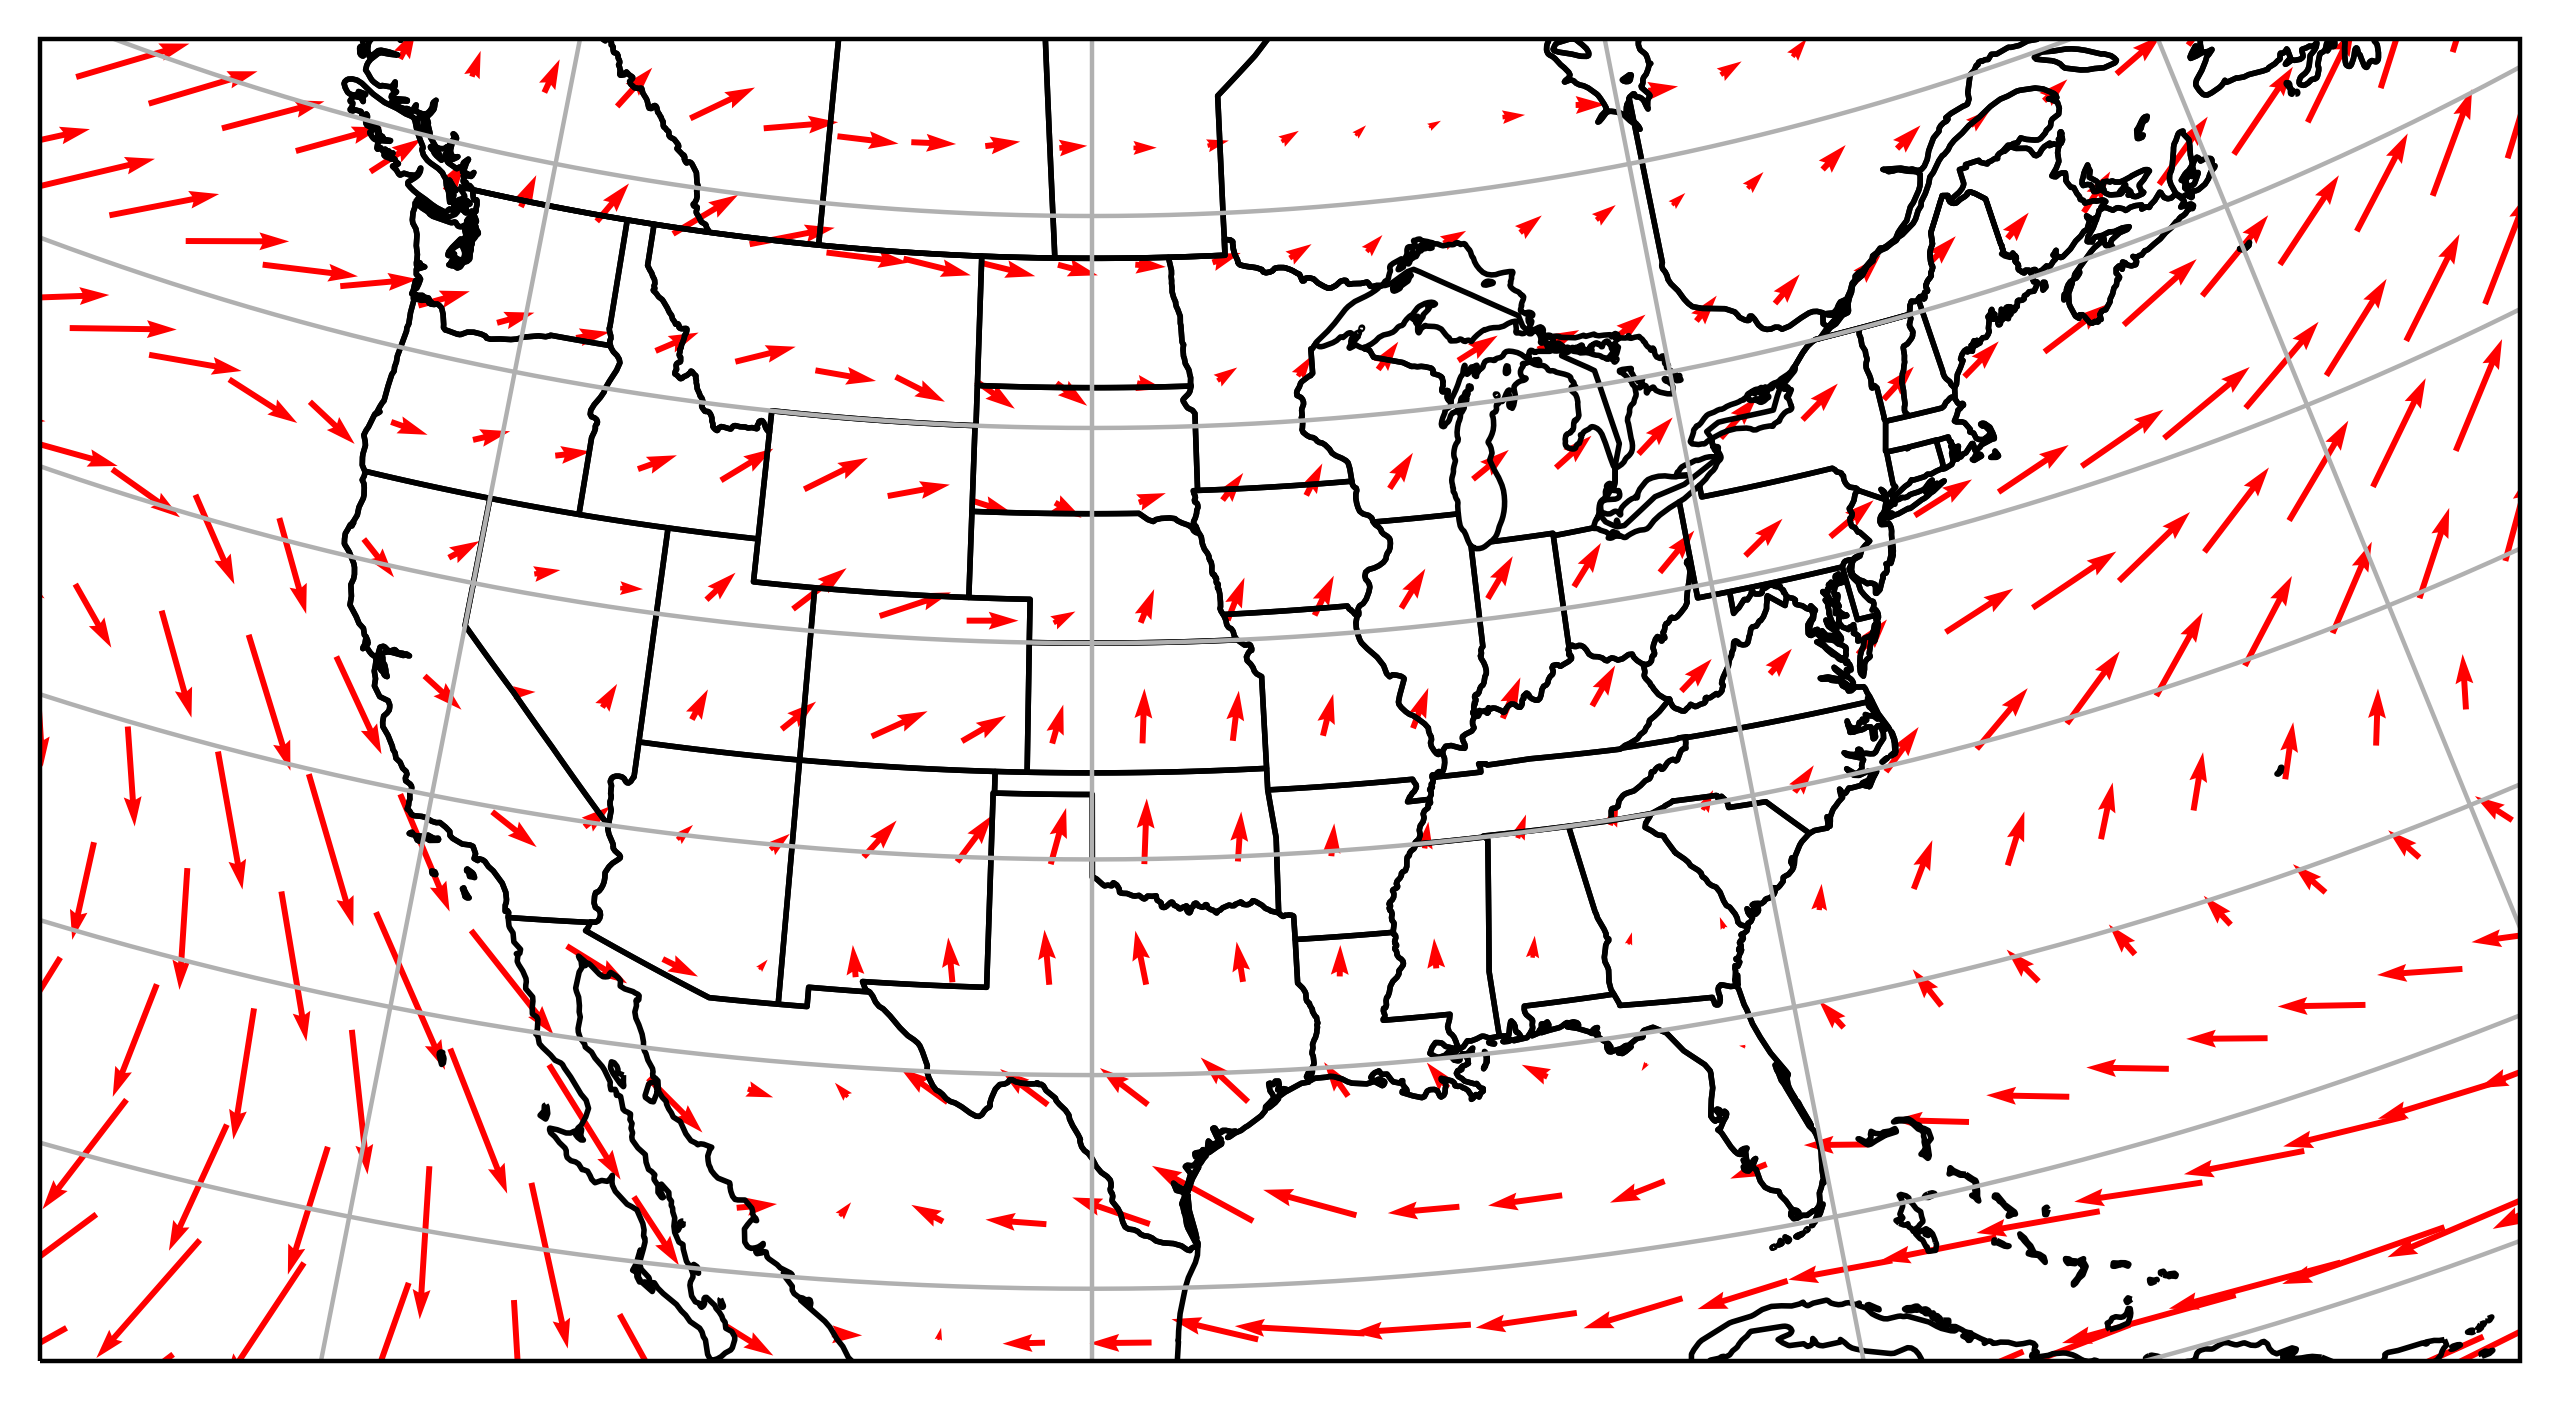

In [25]:
fig = plt.figure(figsize=(8,6),dpi=400) # make a new figure, change resolution
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=-100,
                                             central_latitude=40))

# Here, I take the mean with respect to time (T)
# The quiver function takes (x, y, u, and v)
ax.quiver(uas.lon,uas.lat,uas.mean(dim='T').values,
          vas.mean(dim='T').values,
          transform=ccrs.PlateCarree(),scale=100,color='red')

# limit to just the US
ax.set_extent((-127,-63,20,50))

# spruce up the plot, this time with states and borders
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.STATES)
ax.coastlines()
ax.gridlines()

**Key point**: For gridded model output, our transform argument will almost always be `ccrs.PlateCarree()`.

#### Exercise: Looking at Arctic sea ice

For my research, I spend a lot of time looking at the Arctic. Using the `sic` variable defined below, create a map of the sea ice concentration in March of 1990\*. Use an orthographic projection centered on the North Pole. Add coastlines, gridlines, and be sure to use an appropriate [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

\* As a reminder, these historical model simulations do not correspond to the actual weather at the given date. You can think of it as March 1990 in some other timeline cooked up by the model.

In [26]:
ds = xr.open_dataset('http://strega.ldeo.columbia.edu:81/CMIP5/.byScenario/.historical/'+
                      '.seaIce/.mon/.sic/.CanESM2/.r1i1p1/.sic/dods',
                      decode_times=False)
ds.T.attrs['calendar'] = '360_day'
sic = xr.decode_cf(ds).sic

In [27]:
sic

<xarray.DataArray 'sic' (T: 1872, lat: 64, lon: 128)>
[15335424 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * T        (T) object 1850-01-16 00:00:00 ... 2005-12-16 00:00:00
Attributes:
    cell_methods:      time: mean (interval: 20 minutes)
    standard_name:     sea_ice_area_fraction
    long_name:         Sea Ice Area Fraction
    original_name:     SICN
    cell_measures:     area: areacello
    units:             percent
    comment:           fraction of grid cell covered by sea ice.
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...
    history:           2011-04-06T07:08:01Z altered by CMOR: replaced missing...

In [ ]:
# make figure and plot Orthographic projection

# select and plot sic at correct date

# add coastlines and gridlines


For your final project in this class, you're asked to make a polar stereographic plot. It requires a few more steps to set the proper extent and make the plot circular, as we would expect from this projection. I highly recommend following [this example](https://scitools.org.uk/cartopy/docs/v0.15/examples/always_circular_stereo.html).

#### Exercise: Plotting ENSO

El Niño and La Niña events are some of the most impactful climate events on Earth. El Niños produce especially warm sea surface temperatures in the Eastern Pacific near Peru and central Pacific, while La Niña events produce anomalously cold sea surface temperatures. Using the dataset below, calculate the average sea surface temperature anomaly over the period from July 2007 to June 2008. Plot it on a Mollweide projection, centered on the Pacific, and set the extent to be from 95E to 55W and 60S to 70N. Don't forget coastlines. Based on your plot, was the 2007-2008 event an El Niño or La Niña?

In [28]:
sst = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc').sst
sst

<xarray.DataArray 'sst' (time: 2031, lat: 89, lon: 180)>
[32536620 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-03-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

In [ ]:
# calculate anomaly
anom = sst.sel(time=slice('2007-07-01','2008-06-01')).mean(dim='time') - sst.mean(dim='time')

# make figure and Mollweide projection

# plot anomaly, set extent, add coastlines


That's a La Nina!

## A Extremely Brief Intro to Python Packages

Mike informed me that he told you that I am developing a Python package to help simplify some complicated computations climate scientists have to do. I figured, if there's time, we can at least look at what goes into making a Python package.

Sources: 
* [Setuptools Quickstart Guide](https://setuptools.pypa.io/en/latest/userguide/quickstart.html)
* [Ryan Abernathey's Python Package Lecture](https://earth-env-data-science.github.io/lectures/core_python/organization_and_packaging.html)

Some of the most popular packages (i.e., NumPy, SciPy, Xarray) have hundreds of functions, organized into various sub-units we call *modules*. We are going to keep it simple and make a package with just one module. A directory housing a package might look like this:

    README.md
    LICENSE
    setup.py
    mypkg/__init__.py
    mypkg/function.py
    mypkg/tests/...

Let's talk about some of these ingredients:
* `README.md` contains useful information for users on how the package is organized, how it can be installed, etc. It's meant to be readable.
* `LICENSE` lays out in what circumstances someone can use or distribute this package
* `setup.py` provides all the useful information for installation - the package's name, author, its dependencies, what version of Python you need, etc.
* `__init__.py` gives Python instructions on what to do when you import the package. This is what tells Python that it's a package!
* `function.py` might contain the useful function(s) you want to distribute
* `tests/` houses tests to make sure the package is working as expected

#### \__init__\.py

Any directory that contains an `__init__.py` file is recognized by python as a package. This file can be blank, but it needs to be present. From the root directory, we can import a module from the package as follows:

In [ ]:
from mypkg import function

This is great, but we want to a package to be accessible everywhere! That's what `setup.py` is for.

#### setup.py

This file calls on the setuptools package you previously installed to make your package able to be used anywhere in your python environment. Here is an example set.py file:

In [ ]:
from setuptools import setup

setup(
    name='mypkg',
    version='0.0.1',
    python_requires = '>=3.9',
    install_requires=[
        'numpy'
    ],
)

#### function.py

As for our `function.py`, we could put our previously-made `get_var` function in there and be able to call it in all of our scripts.

### Conclusion

We definitely don't have time to try making our own package, but that was your very brief intro. To see an example of what a more complicated package looks like, check out [my GitHub repository for my climkern package](https://github.com/tyfolino/climkern). I update it weekly.